   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                           Allen, Mr. William Henry    male   35      0   
5                                   Moran, Mr. James    male  NaN      0   
6                            McCarthy, Mr. Timothy J    male   54      0   
7                     Palsson, Master. Gosta Leonard    male    2  

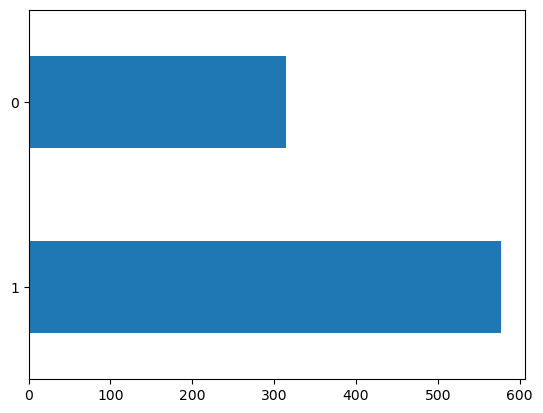

{0: 'female', 1: 'male'}


C:\Users\Pavel\AppData\Local\Temp\ipykernel_10772\1690122020.py:86: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, annot=True, mask=np.zeros_like(corr, dtype=np.bool),


<AxesSubplot:>

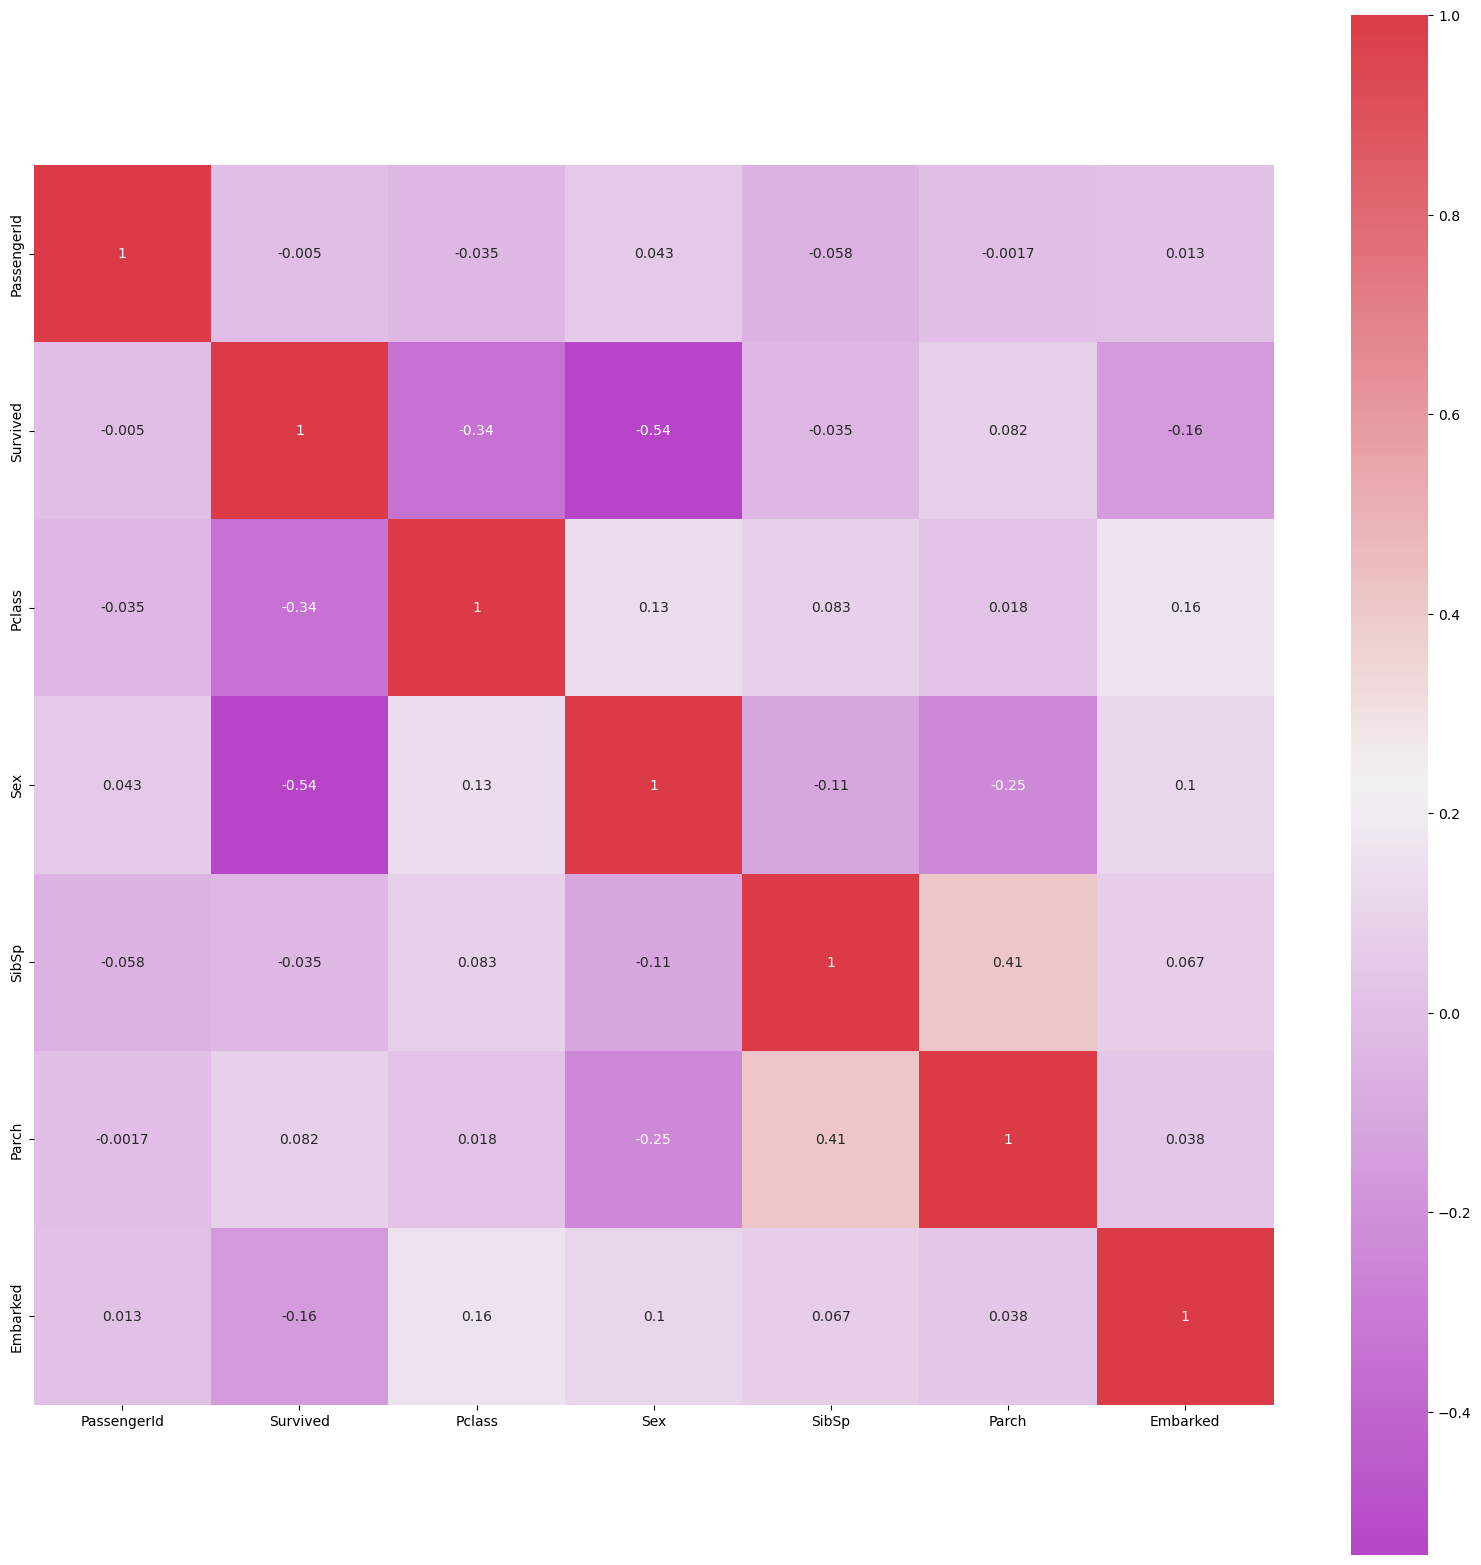

In [17]:
import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Создадим DataFrame структуру
tall = pd.read_csv("data.csv", sep=',', decimal=',')
print(tall.head(8))
print("число строк=", tall.shape[0], "число столбцов=", tall.shape[1])
tall.info()
# Изучим структуру таблицы
cols = tall.columns
for col in cols:
    s = tall[col].dtypes
    print(col, s)
# определим число уникальных значений для текстовых и числовых
cols = tall.columns
for col in cols:
    s=tall[col].dtypes
    if s == 'object' or s == 'int64':
        n=tall[col].nunique()
        print(col, s, n)
#  вычислим для каждого числового поля простейшие статистические характеристики
for col in cols:
    s=tall[col].dtypes
    if s != 'object':
        mean=tall[col].mean()
        median=tall[col].median()
        maxx=tall[col].max()
        minn=tall[col].min()
        print(col, "mean =", mean,"median=", median, "max =", maxx, "min=", minn)
# Рассмотрим поле “Cabin”, которое содержит номера кают. Для определения, у
# каких пассажиров есть информация о номерах кают, 
trCab = tall['PassengerId'][tall['Cabin'].notnull()]
trCab.head(5)
trCab=tall['PassengerId'][tall['Cabin'].isnull()]
trCab.head(10)
print(trCab.shape[0])
tall['PassengerId'][tall['Age'].notnull()].count()
tall.PassengerId[tall.Age.notnull()].count()
medianAge = tall.Age.median()#Вычислим медиану возраста пассажиров
print( medianAge)
# Для замены пустых значений медианным значением используйте оператор
tall.Age[tall.Age.isnull()] #=medianAge
# Разберем поле порта посадки Embarked.
tall[tall.Embarked.isnull()].shape[0]

# Итак, у нас нашлось 2 таких пассажира. Давайте присвоим этим пассажирам порт,
# в котором село больше всего людей.
MaxPassEmb=tall.pivot_table(values='PassengerId', index='Embarked', aggfunc='count')
MaxPassEmb.head()
MaxPassEmb = tall.groupby('Embarked').count()['PassengerId']

Port=MaxPassEmb[MaxPassEmb == MaxPassEmb.max()].index[0]
print(Port)

# Далее присваиваем пропущенным данным название порта, в котором осуществило
# посадку максимальное число пассажиров.
tall.Embarked[tall.Embarked.isnull()]# = Port
# рассмотрим поле цены (Fare). Проверим это поле на пустые значения
tall.PassengerId[tall.Fare.isnull()].shape[0]

# Сохраним полученную таблицу в файле Prak01.scv
tall.to_csv('Prak01.csv', index=False, sep=';', float_format='%.5f', decimal=',' )
tall.head(5)
#Exp03
la = LabelEncoder()
# определить количество уникальных значений
mapped_sex = pd.Series(la.fit_transform(tall['Sex']))
mapped_sex.value_counts().plot.barh()
plt.show()
# Распечатаем уникальные индексы поля Sex и их текстовые значения
dicts = {}
dicts=dict(enumerate(la.classes_))
print(dicts)
# Полученный массив загружаем в таблицу tall
tall['Sex'] = mapped_sex
tall.head(5)
tall['Embarked'] = la.fit_transform(tall['Embarked'])
tall.head(5)
corr =tall.corr()
# представляем корреляционную матрицу
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, annot=True, mask=np.zeros_like(corr, dtype=np.bool),
cmap=sns.diverging_palette(300, 10, as_cmap=True),
square=True, ax=ax)